In [548]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np



data = pd.read_csv('teams.csv')
# all numeric columns
numeric_data = data.select_dtypes(include='number')
topics = ['team_id', 'team_name', 'season', 'league_id', 'team_form', 'games_played_home', 'games_played_away', 'wins_home', 'losses_home', 'draws_home', 'wins_away', 'losses_away', 'draws_away', 'stadium_capacity', 'team_country', 'goals_scored_0_15', 'goals_scored_16_30', 'goals_scored_31_45', 'goals_scored_46_60', 'goals_scored_61_75', 'goals_scored_76_90', 'goals_scored_91_105', 'goals_scored_106_120', 'goals_conceded_0_15', 'goals_conceded_16_30', 'goals_conceded_31_45', 'goals_conceded_46_60', 'goals_conceded_61_75', 'goals_conceded_76_90', 'goals_conceded_91_105', 'goals_conceded_106_120', 'clean_sheets', 'failed_to_score', 'penalty_success_rate', 'over_0_5', 'under_0_5', 'over_1_5', 'under_1_5', 'over_2_5', 'under_2_5', 'over_3_5', 'under_3_5', 'over_4_5', 'under_4_5', 'yellow_cards_0_15', 'yellow_cards_16_30', 'yellow_cards_31_45', 'yellow_cards_46_60', 'yellow_cards_61_75', 'yellow_cards_76_90', 'yellow_cards_91_105', 'yellow_cards_106_120', 'red_cards_0_15', 'red_cards_16_30', 'red_cards_31_45', 'red_cards_46_60', 'red_cards_61_75', 'red_cards_76_90', 'red_cards_91_105', 'red_cards_106_120', 'lineups_per_game']
# Assign column names
data.columns = topics
# To directly modify the original DataFrame to exclude season 2024
data = data[data['season'] != 2024]

print(data.columns.tolist())

['team_id', 'team_name', 'season', 'league_id', 'team_form', 'games_played_home', 'games_played_away', 'wins_home', 'losses_home', 'draws_home', 'wins_away', 'losses_away', 'draws_away', 'stadium_capacity', 'team_country', 'goals_scored_0_15', 'goals_scored_16_30', 'goals_scored_31_45', 'goals_scored_46_60', 'goals_scored_61_75', 'goals_scored_76_90', 'goals_scored_91_105', 'goals_scored_106_120', 'goals_conceded_0_15', 'goals_conceded_16_30', 'goals_conceded_31_45', 'goals_conceded_46_60', 'goals_conceded_61_75', 'goals_conceded_76_90', 'goals_conceded_91_105', 'goals_conceded_106_120', 'clean_sheets', 'failed_to_score', 'penalty_success_rate', 'over_0_5', 'under_0_5', 'over_1_5', 'under_1_5', 'over_2_5', 'under_2_5', 'over_3_5', 'under_3_5', 'over_4_5', 'under_4_5', 'yellow_cards_0_15', 'yellow_cards_16_30', 'yellow_cards_31_45', 'yellow_cards_46_60', 'yellow_cards_61_75', 'yellow_cards_76_90', 'yellow_cards_91_105', 'yellow_cards_106_120', 'red_cards_0_15', 'red_cards_16_30', 'red_c

In [549]:
# Count the number of missing values in each column
missing_values = data.isnull().sum()
# Filter and print only the columns with missing values greater than zero
non_zero_missing = missing_values[missing_values > 0]
print(non_zero_missing)

team_form            413
team_country        1401
lineups_per_game    1401
dtype: int64


In [550]:
# after finding 206 null team_forms - we'll delte those rows - this teams weren't in the league at this season

updated_data = data.loc[~((data['games_played_home'] == 0) & 
                       (data['games_played_away'] == 0) & 
                       (data['wins_home'] == 0) & 
                       (data['losses_home'] == 0) & 
                       (data['draws_home'] == 0) & 
                       (data['wins_away'] == 0) & 
                       (data['losses_away'] == 0) & 
                       (data['draws_away'] == 0) & 
                       data['team_form'].isnull())]

# remove the column lineups_per_game - it includes at each fixture
updated_data = updated_data.drop(columns=['lineups_per_game'])

# Assuming 'data' is your DataFrame
# Convert penalty success rate from percentage to a float (ratio)
updated_data['penalty_success_rate'] = updated_data['penalty_success_rate'] / 100.0

# Display the first few rows to confirm the change
print(updated_data[['penalty_success_rate']].head())


#checking
# Count the number of missing values in each column
missing_values = updated_data.isnull().sum()
# Filter and print only the columns with missing values greater than zero
non_zero_missing = missing_values[missing_values > 0]
print(non_zero_missing)

   penalty_success_rate
1                1.0000
2                1.0000
3                0.6667
4                1.0000
5                1.0000
team_country    988
dtype: int64


In [551]:
# create dict for each league and it's country to fill team_country

team_country_dict = {39: 'England', 140:'Spain', 61:'France', 78:'Germany', 135:'Italy'}
updated_data['team_country'] = updated_data['league_id'].map(team_country_dict)

#checking
# Count the number of missing values in each column
missing_values = updated_data.isnull().sum()
# Filter and print only the columns with missing values greater than zero
non_zero_missing = missing_values[missing_values > 0]
print(non_zero_missing)


Series([], dtype: int64)


In [552]:
# encode the team_country by get_dummies
dummies = pd.get_dummies(updated_data['team_country'], prefix='team_country')
#  include these dummy variables back into original DataFrame and drop the original column
updated_data = pd.concat([updated_data, dummies], axis=1)
updated_data.drop('team_country', axis=1, inplace=True)
# convert in into int and not true/false
dummy_cols = [col for col in updated_data.columns if any(prefix in col for prefix in ['team_country_'])]
updated_data[dummy_cols] = updated_data[dummy_cols].astype(int)

# To see the encoded DataFrame
print(len(updated_data.columns.tolist()))


64


In [553]:
import pandas as pd

# Example dictionary with expected number of teams per league_id
dict_num_teams = {39: 20, 135: 20, 78: 18, 61: 18, 140: 20}

# Assuming 'updated_data' is your DataFrame and it has 'season', 'league_id', and 'team_id' columns
# Group by 'season' and 'league_id', then count the number of unique teams
teams_per_season_league = updated_data.groupby(['season', 'league_id'])['team_id'].nunique()

# Convert the Series to a DataFrame for easier handling
teams_per_season_league_df = teams_per_season_league.reset_index()
teams_per_season_league_df.rename(columns={'team_id': 'num_of_teams'}, inplace=True)

# Check each row to see if it matches the expected number of teams
for index, row in teams_per_season_league_df.iterrows():
    league_id = row['league_id']
    num_of_teams = row['num_of_teams']
    # Only perform the check if the league_id is in your dictionary
    if league_id in dict_num_teams:
        expected_teams = dict_num_teams[league_id]
        if num_of_teams != expected_teams:
            print(f"Season {row['season']} League ID {league_id} has {num_of_teams} teams, expected {expected_teams}.")
            

# lige 1 - 61 - 2023 should be 18 one extra team
# premier league - 2018 missing one team
# bundesliga - 2018-2023 one extra team



Season 2015 League ID 61 has 20 teams, expected 18.
Season 2016 League ID 61 has 20 teams, expected 18.
Season 2017 League ID 61 has 20 teams, expected 18.
Season 2018 League ID 39 has 19 teams, expected 20.
Season 2018 League ID 61 has 20 teams, expected 18.
Season 2018 League ID 78 has 19 teams, expected 18.
Season 2019 League ID 61 has 20 teams, expected 18.
Season 2019 League ID 78 has 19 teams, expected 18.
Season 2020 League ID 61 has 21 teams, expected 18.
Season 2020 League ID 78 has 19 teams, expected 18.
Season 2021 League ID 61 has 21 teams, expected 18.
Season 2021 League ID 78 has 19 teams, expected 18.
Season 2022 League ID 61 has 20 teams, expected 18.
Season 2022 League ID 78 has 19 teams, expected 18.
Season 2023 League ID 61 has 19 teams, expected 18.
Season 2023 League ID 78 has 19 teams, expected 18.


In [554]:
updated_data['num_of_games'] = updated_data['games_played_home'] + updated_data['games_played_away']

# Display the first few rows to confirm the new column is added correctly
print(updated_data[['games_played_home', 'games_played_away', 'num_of_games']])

# Filter rows where the season is not 2024 and the number of games is not 38
updated_data = updated_data[(updated_data['season'] != 2024) & (updated_data['num_of_games'] > 24)]


      games_played_home  games_played_away  num_of_games
1                    19                 19            38
2                    19                 19            38
3                    19                 19            38
4                    19                 19            38
5                    19                 19            38
...                 ...                ...           ...
1489                 19                 19            38
1490                 19                 19            38
1491                 19                 19            38
1492                 19                 19            38
1495                 19                 19            38

[988 rows x 3 columns]


In [555]:
# normalize stadium capacity with min-max - between 0-1 - not standartization cause I can't assume it normally distribute
# Install scikit-learn if not already installed
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Fit and transform 'stadium_capacity'
updated_data['stadium_capacity_normalized'] = min_max_scaler.fit_transform(updated_data[['stadium_capacity']])

print(updated_data['stadium_capacity_normalized'])

1       0.212370
2       0.212370
3       0.712608
4       0.884287
5       0.465807
          ...   
1489    0.421022
1490    0.931939
1491    0.684312
1492    0.788106
1495    0.501840
Name: stadium_capacity_normalized, Length: 979, dtype: float64


In [556]:
# dict of LDW values
form_dict = {'L':0, 'D':1, 'W':3}

def process_team_form(row):
    # Replace each character in the string according to the dictionary
    form_numeric_string = ''.join(str(form_dict[char]) for char in row['team_form'])
    return int(form_numeric_string)  

updated_data_copy = updated_data.copy()

# Apply the function to the DataFrame
updated_data_copy['team_form_numeric'] = updated_data_copy.apply(process_team_form, axis=1)

# update it on the origin df
# Apply the function to the team_form column and create a new team_form_decimal column
updated_data['team_form_numeric'] = updated_data_copy[['team_form_numeric']]

# Drop the original team_form column
updated_data.drop('team_form', axis=1, inplace=True)

print(updated_data['team_form_numeric'])


1       30101313000330003300003313311033131130
2          10013013130300330013110113000303000
3         331103330310113333031330301330030133
4        3031033331331333130131131133333130013
5       33330030031331003030310301103001301033
                         ...                  
1489    10110011001000011001113103001030003030
1490    33331333133133310011111303133101330303
1491    33333333133133013333333333013131330133
1492    30333303333313130101103330333101333313
1495      131031303333333333333331333333333303
Name: team_form_numeric, Length: 979, dtype: object


In [557]:
# add points for every 5 fixtures
def calculate_points(data):
    max_fixtures = 40
    for i in range(5, max_fixtures+1, 5):
        data[f'fixture_{i}_points'] = data['team_form_numeric'].apply(
            lambda x: sum(int(y) for y in str(x)[:i])
        )

    # Calculate the end season points, consider the length of the string for leagues with fewer than 40 fixtures
    data['end_season_points'] = data['team_form_numeric'].apply(
        lambda x: sum(int(y) for y in str(x))
    )

    # For leagues with fewer than 40 fixtures, copy the end_season_points to fixture_40_points
    data['fixture_40_points'] = data.apply(
        lambda row: row['end_season_points'] if 'fixture_40_points' not in row else row['fixture_40_points'],
        axis=1
    )

    return data

# Assuming updated_data is your DataFrame
updated_data = calculate_points(updated_data)
print(updated_data[['fixture_5_points', 'fixture_10_points', 'fixture_15_points', 'fixture_20_points', 'fixture_25_points', 'fixture_30_points', 'fixture_35_points', 'fixture_40_points', 'end_season_points']])


      fixture_5_points  fixture_10_points  fixture_15_points  \
1                    5                 12                 18   
2                    5                 13                 19   
3                    8                 20                 26   
4                    7                 20                 33   
5                   12                 18                 26   
...                ...                ...                ...   
1489                 3                  5                  6   
1490                13                 26                 39   
1491                15                 28                 38   
1492                12                 24                 35   
1495                 8                 18                 33   

      fixture_20_points  fixture_25_points  fixture_30_points  \
1                    24                 31                 39   
2                    26                 30                 36   
3                    38             

In [558]:
# add "grades" columns for each 5 fixtures - the success rate
def add_success_rate(data):
    max_fixtures = 40
    # Add grades for each 5 fixtures
    for i in range(5, max_fixtures+1, 5):
        max_points = 3 * i
        column_name = f'fixture_{i}_points'
        grade_column = f'fixture_{i}_grade'
        if column_name in data.columns:
            data[grade_column] = data[column_name] / max_points

    # Calculate end of season grade
    data['end_season_grade'] = data['end_season_points'] / (3*(data['games_played_home'] + data['games_played_away']))

    return data

# Assuming updated_data is your DataFrame
updated_data = add_success_rate(updated_data)
print(updated_data[['fixture_5_grade', 'fixture_10_grade', 'fixture_15_grade', 'fixture_20_grade', 'fixture_25_grade', 'fixture_30_grade', 'fixture_35_grade', 'fixture_40_grade', 'end_season_grade']])


      fixture_5_grade  fixture_10_grade  fixture_15_grade  fixture_20_grade  \
1            0.333333          0.400000          0.400000          0.400000   
2            0.333333          0.433333          0.422222          0.433333   
3            0.533333          0.666667          0.577778          0.633333   
4            0.466667          0.666667          0.733333          0.683333   
5            0.800000          0.600000          0.577778          0.533333   
...               ...               ...               ...               ...   
1489         0.200000          0.166667          0.133333          0.150000   
1490         0.866667          0.866667          0.866667          0.700000   
1491         1.000000          0.933333          0.844444          0.850000   
1492         0.800000          0.800000          0.777778          0.666667   
1495         0.533333          0.600000          0.733333          0.800000   

      fixture_25_grade  fixture_30_grade  fixture_3

In [559]:
updated_data.head()

# Calculate home win, loss, and draw percentages
updated_data['win_home_pct'] = (updated_data['wins_home'] / updated_data['games_played_home']).fillna(0)
updated_data['loss_home_pct'] = (updated_data['losses_home'] / updated_data['games_played_home']).fillna(0)
updated_data['draw_home_pct'] = (updated_data['draws_home'] / updated_data['games_played_home']).fillna(0)

# Calculate away win, loss, and draw percentages
updated_data['win_away_pct'] = (updated_data['wins_away'] / updated_data['games_played_away']).fillna(0)
updated_data['loss_away_pct'] = (updated_data['losses_away'] / updated_data['games_played_away']).fillna(0)
updated_data['draw_away_pct'] = (updated_data['draws_away'] / updated_data['games_played_away']).fillna(0)

# Fill NaN with 0 in case of division by zero (where games played is zero)
# Assuming that you would want to consider 0 games as 0% win, loss, or draw.

# Display the new columns to confirm changes
print(updated_data[['win_home_pct', 'loss_home_pct', 'draw_home_pct', 'win_away_pct', 'loss_away_pct', 'draw_away_pct']].head())


   win_home_pct  loss_home_pct  draw_home_pct  win_away_pct  loss_away_pct  \
1      0.421053       0.368421       0.210526      0.368421       0.368421   
2      0.210526       0.473684       0.315789      0.315789       0.526316   
3      0.526316       0.263158       0.210526      0.473684       0.315789   
4      0.473684       0.315789       0.210526      0.631579       0.000000   
5      0.368421       0.421053       0.210526      0.473684       0.368421   

   draw_away_pct  
1       0.263158  
2       0.157895  
3       0.210526  
4       0.368421  
5       0.157895  


In [560]:

# Identify all columns that contain 'goals_scored_'
goals_scored_columns = [col for col in updated_data.columns if 'goals_scored_' in col]

# Apply Min-Max scaling to each 'goals_scored_' column
for col in goals_scored_columns:
    # Calculate the minimum and maximum
    min_value = updated_data[col].min()
    max_value = updated_data[col].max()
    
    # Apply Min-Max scaling: (value - min) / (max - min)
    updated_data[col + '_scaled'] = (updated_data[col] - min_value) / (max_value - min_value)

# Display the new scaled columns to confirm changes
print(updated_data[[col + '_scaled' for col in goals_scored_columns]].head())


   goals_scored_0_15_scaled  goals_scored_16_30_scaled  \
1                      0.30                   0.000000   
2                      0.45                   0.190476   
3                      0.45                   0.476190   
4                      0.45                   0.428571   
5                      0.60                   0.142857   

   goals_scored_31_45_scaled  goals_scored_46_60_scaled  \
1                   0.291667                   0.269231   
2                   0.250000                   0.269231   
3                   0.458333                   0.500000   
4                   0.291667                   0.423077   
5                   0.333333                   0.307692   

   goals_scored_61_75_scaled  goals_scored_76_90_scaled  \
1                   0.333333                       0.36   
2                   0.041667                       0.12   
3                   0.125000                       0.44   
4                   0.583333                       0.44   
5

In [561]:
#  Sum all yellow cards columns into one column
yellow_card_columns = [col for col in updated_data.columns if 'yellow_cards_' in col]
updated_data['yellow_card_sum'] = updated_data[yellow_card_columns].sum(axis=1)

# Sum all red cards columns into one column
red_card_columns = [col for col in updated_data.columns if 'red_cards_' in col]
updated_data['red_card_sum'] = updated_data[red_card_columns].sum(axis=1)

col = ['yellow_card_sum','red_card_sum']
# use max_min scaling
for col in col:
    # Calculate the minimum and maximum
    min_value = updated_data[col].min()
    max_value = updated_data[col].max()

    # Apply Min-Max scaling: (value - min) / (max - min)
    updated_data[col + '_scaled'] = (updated_data[col] - min_value) / (max_value - min_value)

In [562]:
# clean sheets, failed to score and over and unders - scale by num_of_games

# List of specific columns to scale by 'num_of_games'
columns_to_scale = ['clean_sheets', 'failed_to_score']  # Add the base names of the over/under columns as needed

# Adding over and under columns dynamically if they follow a predictable pattern
over_under_columns = [col for col in updated_data.columns if 'over_' in col or 'under_' in col]
columns_to_scale.extend(over_under_columns)

# Scale each of the specified columns by 'num_of_games'
for col in columns_to_scale:
    updated_data[col + '_per_game'] = updated_data[col] / updated_data['num_of_games']

# Check for division by zero issues, replace NaN or inf with zero (where num_of_games might be zero)
updated_data.fillna(0, inplace=True)
updated_data.replace([np.inf, -np.inf], 0, inplace=True)

# Display the new scaled columns to confirm changes
print(updated_data[[col + '_per_game' for col in columns_to_scale]].head())


   clean_sheets_per_game  failed_to_score_per_game  over_0_5_per_game  \
1               0.394737                  0.263158           0.736842   
2               0.289474                  0.447368           0.552632   
3               0.289474                  0.184211           0.815789   
4               0.342105                  0.210526           0.789474   
5               0.394737                  0.210526           0.789474   

   under_0_5_per_game  over_1_5_per_game  under_1_5_per_game  \
1            0.263158           0.289474            0.710526   
2            0.447368           0.210526            0.789474   
3            0.184211           0.500000            0.500000   
4            0.210526           0.526316            0.473684   
5            0.210526           0.368421            0.631579   

   over_2_5_per_game  under_2_5_per_game  over_3_5_per_game  \
1           0.105263            0.894737           0.000000   
2           0.078947            0.921053          

In [563]:
updated_data.head()

,team_id,team_name,season,league_id,games_played_home,games_played_away,wins_home,losses_home,draws_home,wins_away,...,over_0_5_per_game,under_0_5_per_game,over_1_5_per_game,under_1_5_per_game,over_2_5_per_game,under_2_5_per_game,over_3_5_per_game,under_3_5_per_game,over_4_5_per_game,under_4_5_per_game
1,44,Burnley,2019,39,19,19,8,7,4,7,...,0.736842,0.263158,0.289474,0.710526,0.105263,0.894737,0.000000,1.000000,0.000000,1.000000
2,44,Burnley,2020,39,19,19,4,9,6,6,...,0.552632,0.447368,0.210526,0.789474,0.078947,0.921053,0.026316,0.973684,0.000000,1.000000
3,48,West Ham,2020,39,19,19,10,5,4,9,...,0.815789,0.184211,0.500000,0.500000,0.289474,0.710526,0.026316,0.973684,0.000000,1.000000
4,33,Manchester United,2020,39,19,19,9,6,4,12,...,0.789474,0.210526,0.526316,0.473684,0.342105,0.657895,0.078947,0.921053,0.052632,0.947368
5,66,Aston Villa,2020,39,19,19,7,8,4,9,...,0.789474,0.210526,0.368421,0.631579,0.184211,0.815789,0.026316,0.973684,0.026316,0.973684


In [564]:
print(updated_data.columns.tolist()[:40])
print(updated_data.columns.tolist()[40:122])

['team_id', 'team_name', 'season', 'league_id', 'games_played_home', 'games_played_away', 'wins_home', 'losses_home', 'draws_home', 'wins_away', 'losses_away', 'draws_away', 'stadium_capacity', 'goals_scored_0_15', 'goals_scored_16_30', 'goals_scored_31_45', 'goals_scored_46_60', 'goals_scored_61_75', 'goals_scored_76_90', 'goals_scored_91_105', 'goals_scored_106_120', 'goals_conceded_0_15', 'goals_conceded_16_30', 'goals_conceded_31_45', 'goals_conceded_46_60', 'goals_conceded_61_75', 'goals_conceded_76_90', 'goals_conceded_91_105', 'goals_conceded_106_120', 'clean_sheets', 'failed_to_score', 'penalty_success_rate', 'over_0_5', 'under_0_5', 'over_1_5', 'under_1_5', 'over_2_5', 'under_2_5', 'over_3_5', 'under_3_5']
['over_4_5', 'under_4_5', 'yellow_cards_0_15', 'yellow_cards_16_30', 'yellow_cards_31_45', 'yellow_cards_46_60', 'yellow_cards_61_75', 'yellow_cards_76_90', 'yellow_cards_91_105', 'yellow_cards_106_120', 'red_cards_0_15', 'red_cards_16_30', 'red_cards_31_45', 'red_cards_46_6

In [565]:
# drop for clustering
clustering_data = updated_data.copy()

# Specify columns to drop (including individual yellow and red card columns)
columns_to_drop = ['team_id', 'team_name', 'season', 'league_id', 'games_played_home', 'games_played_away', 'stadium_capacity', 'goals_scored_0_15', 'goals_scored_16_30', 'goals_scored_31_45', 'goals_scored_46_60', 'goals_scored_61_75', 'goals_scored_76_90', 'goals_scored_91_105', 'goals_scored_106_120', 'goals_conceded_0_15', 'goals_conceded_16_30', 'goals_conceded_31_45', 'goals_conceded_46_60', 'goals_conceded_61_75', 'goals_conceded_76_90', 'goals_conceded_91_105', 'goals_conceded_106_120', 'clean_sheets', 'failed_to_score', 'over_0_5', 'under_0_5', 'over_1_5', 'under_1_5', 'over_2_5', 'under_2_5', 'over_3_5', 'under_3_5' ,'over_4_5', 'under_4_5', 'yellow_cards_0_15', 'yellow_cards_16_30', 'yellow_cards_31_45', 'yellow_cards_46_60', 'yellow_cards_61_75', 'yellow_cards_76_90', 'yellow_cards_91_105', 'yellow_cards_106_120', 'red_cards_0_15', 'red_cards_16_30', 'red_cards_31_45', 'red_cards_46_60', 'red_cards_61_75', 'red_cards_76_90', 'red_cards_91_105', 'red_cards_106_120', 'team_form_numeric', 'fixture_5_points', 'fixture_10_points', 'fixture_15_points', 'fixture_20_points', 'fixture_25_points', 'fixture_30_points', 'fixture_35_points', 'fixture_40_points', 'end_season_points','wins_home', 'losses_home', 'draws_home', 'wins_away', 'losses_away', 'draws_away','num_of_games','team_country_England', 'team_country_France', 'team_country_Germany', 'team_country_Italy', 'team_country_Spain']

# Drop the specified columns
clustering_data.drop(columns=columns_to_drop, inplace=True)

# Show the updated DataFrame structure
print(clustering_data.columns.to_list())

['penalty_success_rate', 'stadium_capacity_normalized', 'fixture_5_grade', 'fixture_10_grade', 'fixture_15_grade', 'fixture_20_grade', 'fixture_25_grade', 'fixture_30_grade', 'fixture_35_grade', 'fixture_40_grade', 'end_season_grade', 'win_home_pct', 'loss_home_pct', 'draw_home_pct', 'win_away_pct', 'loss_away_pct', 'draw_away_pct', 'goals_scored_0_15_scaled', 'goals_scored_16_30_scaled', 'goals_scored_31_45_scaled', 'goals_scored_46_60_scaled', 'goals_scored_61_75_scaled', 'goals_scored_76_90_scaled', 'goals_scored_91_105_scaled', 'goals_scored_106_120_scaled', 'yellow_card_sum', 'red_card_sum', 'yellow_card_sum_scaled', 'red_card_sum_scaled', 'clean_sheets_per_game', 'failed_to_score_per_game', 'over_0_5_per_game', 'under_0_5_per_game', 'over_1_5_per_game', 'under_1_5_per_game', 'over_2_5_per_game', 'under_2_5_per_game', 'over_3_5_per_game', 'under_3_5_per_game', 'over_4_5_per_game', 'under_4_5_per_game']


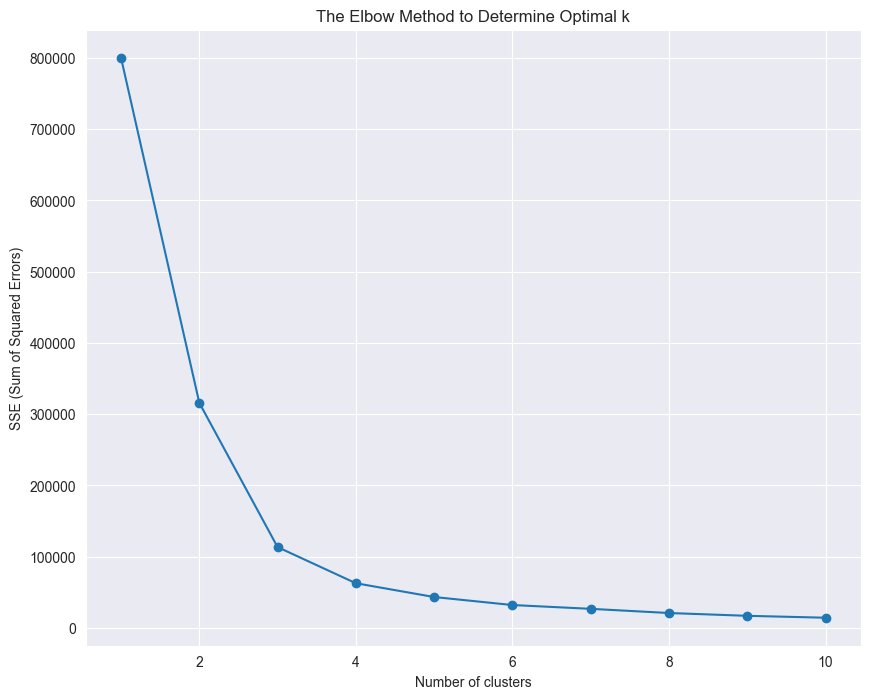

this is clusters [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 2 0 0 1 0 1 0 0 0 2 2 2 0 2 2 2 2 0 0 0 2 2 1 0 2 2 2 2 2 2 1 2 2 2
 1 1 1 0 1 1 0 2 2 2 2 2 1 1 2 1 2 2 1 1 0 1 1 1 1 2 2 2 1 2 2 2 2 1 1 1 1
 1 0 0 2 2 2 2 0 1 0 0 2 2 2 1 0 2 2 2 0 2 2 2 1 2 2 1 1 1 0 0 1 1 0 1 2 1
 1 2 1 2 2 1 1 2 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2

In [566]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: Choosing the number of clusters
# Use the Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)  # Fit the original data directly
    sse.append(kmeans.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('The Elbow Method to Determine Optimal k')
plt.show()

# Step 3: Apply K-means
# Choose the k after you find the elbow point from the plot, example value k_optimal might be 5 or as determined
k_optimal = 3 
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(clustering_data)  # Predict using the unnormalized data
print(f"this is clusters {clusters}")
# Add cluster labels to your original DataFrame
updated_data['Cluster'] = clusters

# Step 4: Analyze the Results
# Display the DataFrame with clusters
print(updated_data.columns.to_list())


print('*'*15)
# Group data by cluster
cluster_groups = updated_data.groupby('Cluster')

# Print the teams and their seasons in each cluster
for cluster, data in cluster_groups:
    print(f"Cluster {cluster}:")
    # Create a list of tuples containing both 'team_name' and 'season'
    team_season_list = list(zip(data['team_name'], data['season']))
    print(team_season_list)
    print("\n")  # Adds a newline for better separation between clusters

    
print('*'*15)



Number of teams in each cluster:
Cluster
0    517
1    361
2    101
Name: count, dtype: int64


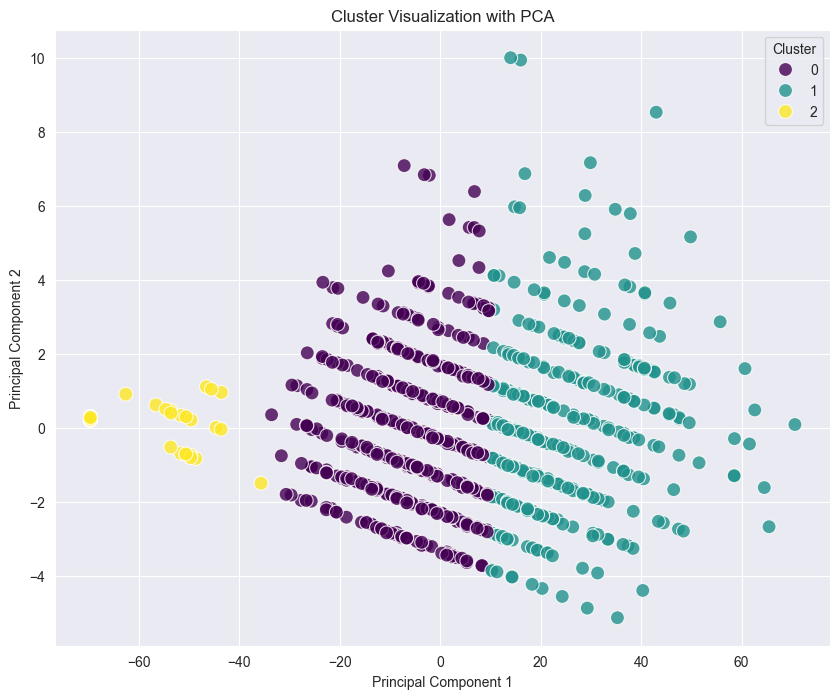

In [567]:
# plots to understand it better
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Count teams in each cluster
cluster_counts = updated_data['Cluster'].value_counts()
print("Number of teams in each cluster:")
print(cluster_counts)

# Dimensionality reduction for visualization (using PCA for 2D visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(clustering_data)

# Create a scatter plot of the two PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=updated_data['Cluster'], palette='viridis', s=100, alpha=0.8)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [568]:
# Iterate over each cluster number (assuming clusters are labeled 0 through 3)
for cluster_num in range(3):  # Adjust the range if you have more or fewer clusters
    # Filter the DataFrame for rows where the 'Cluster' column matches the current cluster number
    cluster_data = updated_data[updated_data['Cluster'] == cluster_num]

    print(f"Cluster {cluster_num}:")
    
    # Check if 'end_season_grade' is in the columns to avoid errors
    if 'end_season_grade' in cluster_data.columns:
        # Calculate and print the average 'end_season_grade' for the cluster
        average_grade = cluster_data['end_season_grade'].mean()
        print(f"Average end season grade: {average_grade:.2f}")

        # Calculate and print the minimum and maximum 'end_season_grade' for the cluster
        min_grade = cluster_data['end_season_grade'].min()
        max_grade = cluster_data['end_season_grade'].max()
        print(f"Range of end season grade: {min_grade} to {max_grade}")

        # Print the specified columns for this filtered DataFrame
        print(cluster_data[['team_name', 'season', 'end_season_grade', 'Cluster']])
    else:
        print("No 'end_season_grade' column found.")
    
    print("\n")  # Adds a newline for better separation between clusters


Cluster 0:
Average end season grade: 0.48
Range of end season grade: 0.14035087719298245 to 0.8823529411764706
              team_name  season  end_season_grade  Cluster
1               Burnley    2019          0.473684        0
2               Burnley    2020          0.342105        0
3              West Ham    2020          0.570175        0
4     Manchester United    2020          0.649123        0
5           Aston Villa    2020          0.482456        0
...                 ...     ...               ...      ...
1483             Torino    2017          0.473684        0
1486              Genoa    2017          0.359649        0
1490              Inter    2017          0.631579        0
1491             Napoli    2017          0.798246        0
1492            AS Roma    2017          0.675439        0

[517 rows x 4 columns]


Cluster 1:
Average end season grade: 0.42
Range of end season grade: 0.14035087719298245 to 0.7982456140350878
          team_name  season  end_season_grad

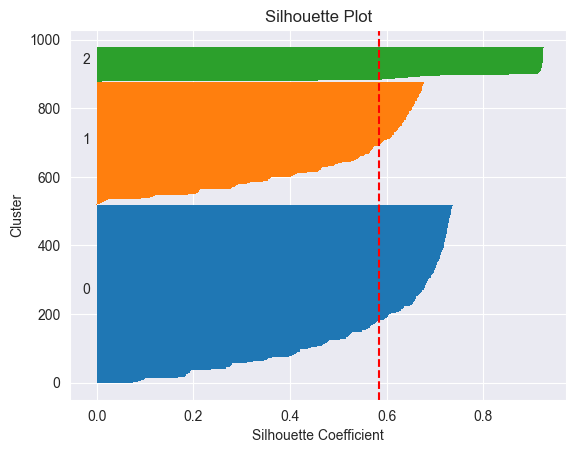

In [569]:
# Silhouette Plot
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores
silhouette_vals = silhouette_samples(clustering_data, clusters)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(range(k_optimal)):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.03, (y_lower + y_upper) / 2, str(cluster))
    y_lower += len(cluster_silhouette_vals)

# The silhouette score gives a perspective into the density and separation of the formed clusters
plt.axvline(x=silhouette_score(clustering_data, clusters), color="red", linestyle="--")
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.show()


Explained variance ratio of each component: [9.94092746e-01 4.97553854e-03 5.56052367e-04 4.91937763e-05
 4.31464279e-05 3.43737316e-05 3.00144053e-05 2.58957924e-05
 2.30397384e-05 2.03053478e-05 1.94470294e-05 1.78957296e-05
 1.74243517e-05 1.70379872e-05 1.65265384e-05 1.55058522e-05
 1.19576081e-05 9.25875756e-06 6.16819690e-06 4.20082966e-06
 3.34038000e-06 2.75884983e-06 2.15400418e-06 1.76211178e-06
 1.68236416e-06 8.67676403e-07 8.07426997e-07 5.09347748e-07
 2.71698768e-07 1.16864793e-07 7.30349491e-10 6.45462041e-17
 3.48073211e-19 8.06781349e-20 4.73872700e-20 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Cumulative explained variance: [0.99409275 0.99906828 0.99962434 0.99967353 0.99971668 0.99975105
 0.99978106 0.99980696 0.99983    0.99985031 0.99986975 0.99988765
 0.99990507 0.99992211 0.99993864 0.99995414 0.9999661  0.99997536
 0.99998153 0.99998573 0.99998907 0.99999183 0.99999398 0.99999574
 0.99999743 0.99999829 0.99999

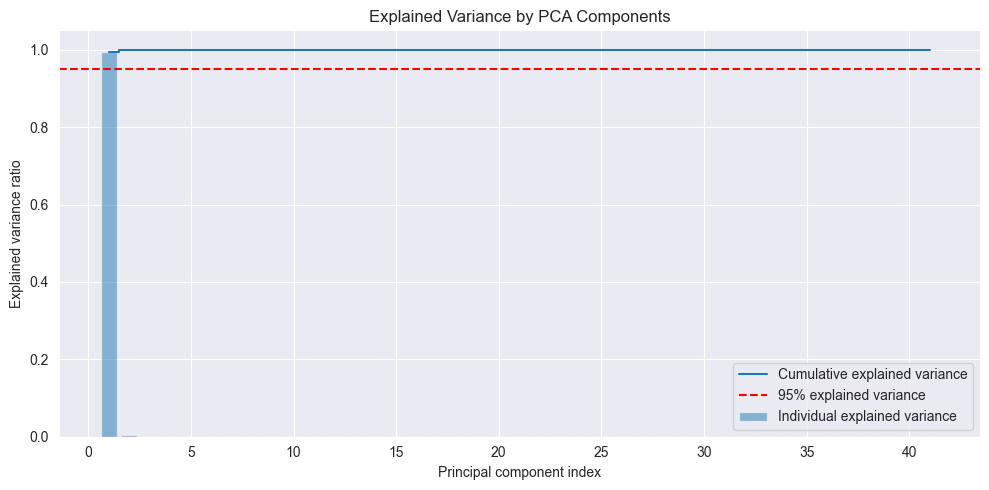

Number of components to explain 95% variance: 1


In [570]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA
pca = PCA()
pca.fit(clustering_data)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each component:", explained_variance_ratio)

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative explained variance:", cumulative_explained_variance)

# Plotting the explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Find the number of components needed to explain at least 95% of the variance
n_components_95 = (cumulative_explained_variance < 0.95).sum() + 1
print(f"Number of components to explain 95% variance: {n_components_95}")


C:\Users\peret\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


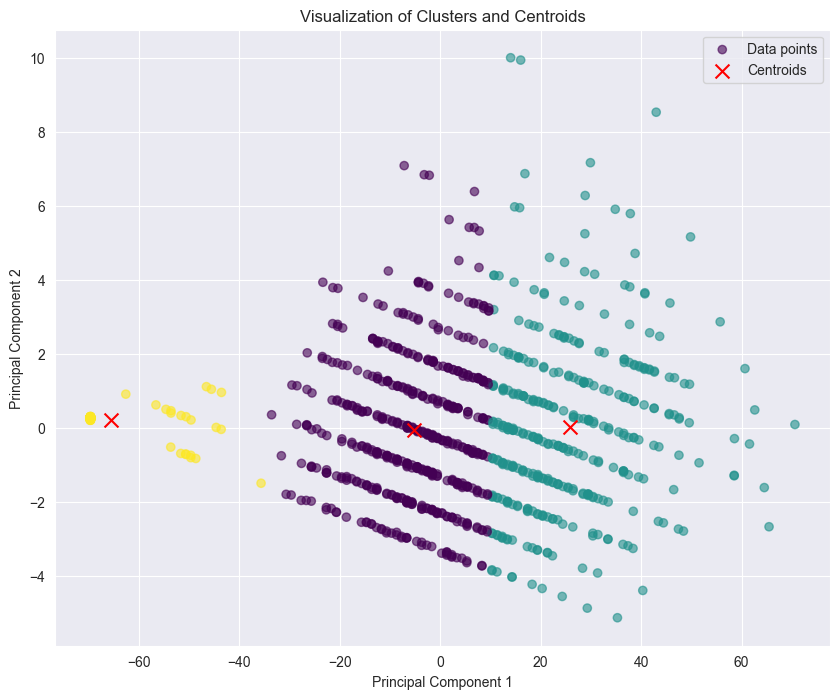

Centroids of the clusters:
   penalty_success_rate  stadium_capacity_normalized  fixture_5_grade  \
0              0.969124                     0.446560         0.539394   
1              0.964437                     0.392735         0.478670   
2              0.980198                     0.452225         0.491749   

   fixture_10_grade  fixture_15_grade  fixture_20_grade  fixture_25_grade  \
0          0.511928          0.500537          0.494939          0.491941   
1          0.450139          0.439951          0.437950          0.432022   
2          0.480528          0.469527          0.466337          0.462706   

   fixture_30_grade  fixture_35_grade  fixture_40_grade  ...  \
0          0.489383          0.479359          0.439894  ...   
1          0.432902          0.428545          0.399954  ...   
2          0.466777          0.464121          0.432673  ...   

   over_0_5_per_game  under_0_5_per_game  over_1_5_per_game  \
0           0.748527            0.251473           

In [571]:

# Step 1: Configure and run KMeans clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Extract centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=clustering_data.columns)

# Step 2: Reduce data dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data)
centroids_reduced = pca.transform(centroids)  # Transform centroids for consistent plotting

# Step 3: Visualize the clusters and centroids
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6, label='Data points')
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', s=100, marker='x', label='Centroids')
plt.title('Visualization of Clusters and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Optional: Print the centroids for reference
print("Centroids of the clusters:")
print(centroids_df)


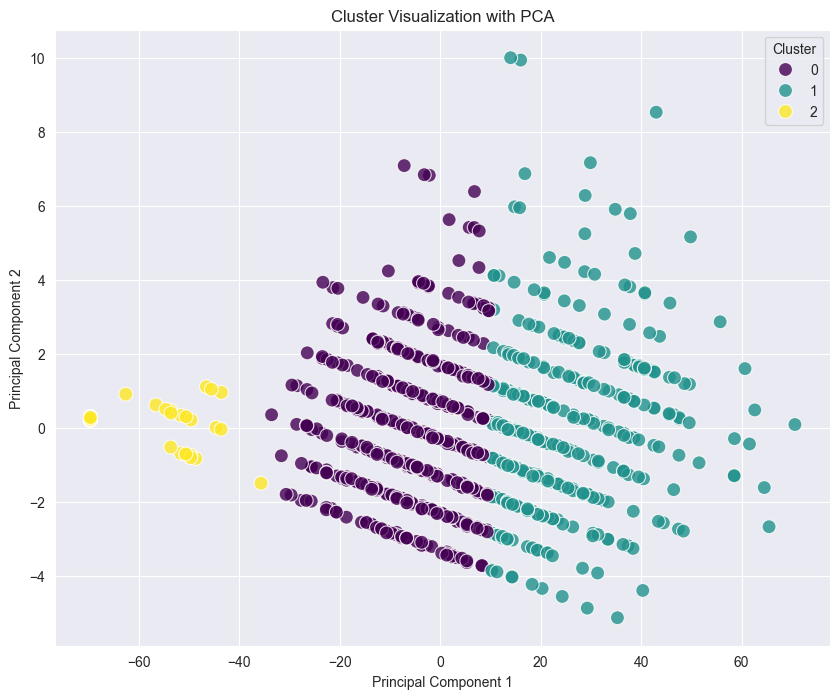

C:\Users\peret\AppData\Local\Temp\ipykernel_33144\1783987503.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=updated_data, x='Cluster', y='Distance_to_Centroid', palette='viridis')


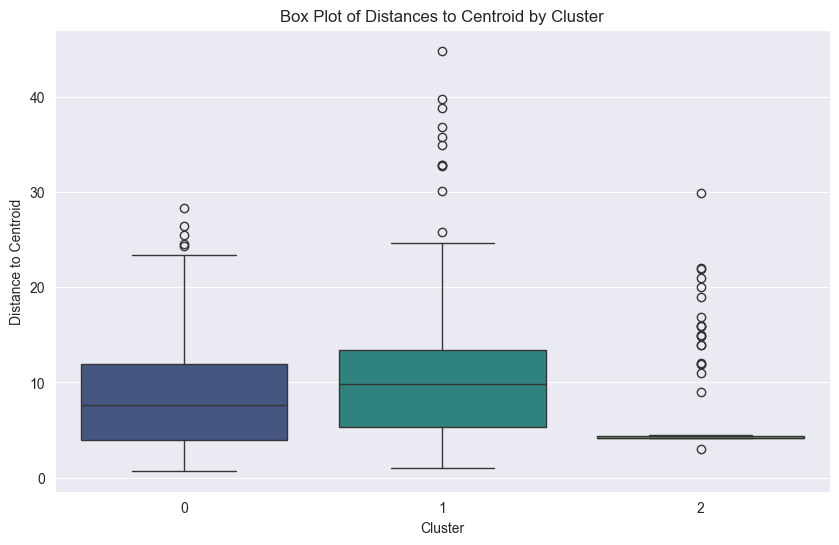

C:\Users\peret\AppData\Local\Temp\ipykernel_33144\1783987503.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=updated_data, x='Cluster', y='Distance_to_Centroid', palette='viridis')


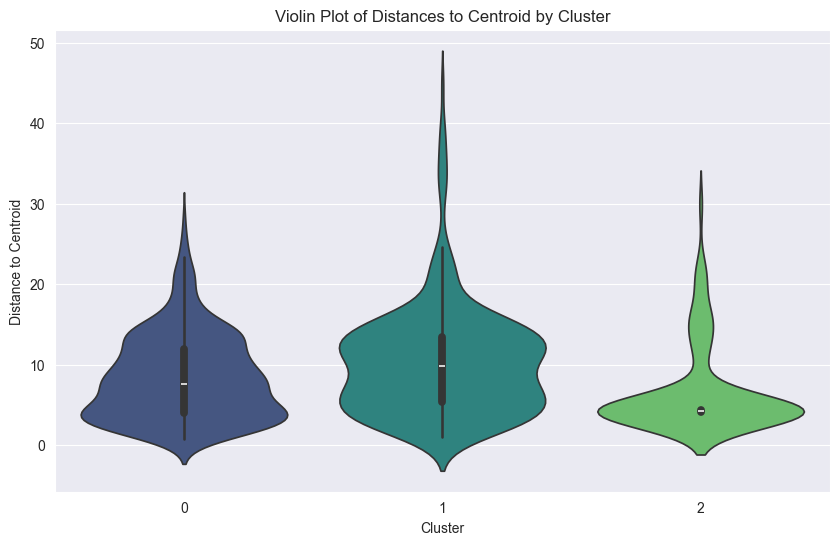

Number of teams in each cluster:
Cluster
0    517
1    361
2    101
Name: count, dtype: int64


In [572]:

# Step 1: Filter numeric columns used for clustering
numeric_features = clustering_data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

# Step 2: Run KMeans clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_features)  # Use only numeric features for clustering

# Assign clusters back to the DataFrame
updated_data['Cluster'] = clusters

# Step 3: Dimensionality reduction using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(numeric_features)  # Use the same features used for clustering

# Scatter plot of the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=updated_data['Cluster'], palette='viridis', s=100, alpha=0.8)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 4: Calculate distances to centroids
centroids = kmeans.cluster_centers_

# Function to calculate the Euclidean distance of each point to its centroid
def calculate_distances(row, centroid):
    return np.sqrt(np.sum((row - centroid) ** 2))

# Add distance to centroid for each point
updated_data['Distance_to_Centroid'] = numeric_features.apply(
    lambda row: calculate_distances(row.values, centroids[int(updated_data.loc[row.name, 'Cluster'])]), axis=1
)

# Step 5: Visualize distances using box and violin plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=updated_data, x='Cluster', y='Distance_to_Centroid', palette='viridis')
plt.title('Box Plot of Distances to Centroid by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Distance to Centroid')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=updated_data, x='Cluster', y='Distance_to_Centroid', palette='viridis')
plt.title('Violin Plot of Distances to Centroid by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Distance to Centroid')
plt.show()

# Step 6: Print the number of teams in each cluster
cluster_counts = updated_data['Cluster'].value_counts()
print("Number of teams in each cluster:")
print(cluster_counts)


In [573]:
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(clustering_data, clusters)
print(f"Calinski-Harabasz Index: {ch_score}")

from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(clustering_data, clusters)
print(f"Davies-Bouldin Index: {db_score}")



Calinski-Harabasz Index: 2958.199889960737
Davies-Bouldin Index: 0.48526627858778865


In [574]:
print(clustering_data.describe())

       penalty_success_rate  stadium_capacity_normalized  fixture_5_grade  \
count            979.000000                   979.000000       979.000000   
mean               0.968538                     0.427297         0.512087   
std                0.147121                     0.232205         0.214076   
min                0.000000                     0.000000         0.066667   
25%                1.000000                     0.249405         0.333333   
50%                1.000000                     0.376111         0.466667   
75%                1.000000                     0.610298         0.666667   
max                1.000000                     1.000000         1.000000   

       fixture_10_grade  fixture_15_grade  fixture_20_grade  fixture_25_grade  \
count        979.000000        979.000000        979.000000        979.000000   
mean           0.485904          0.474997          0.470974          0.466830   
std            0.182944          0.167623          0.160793    

try to weight the end of the season gread


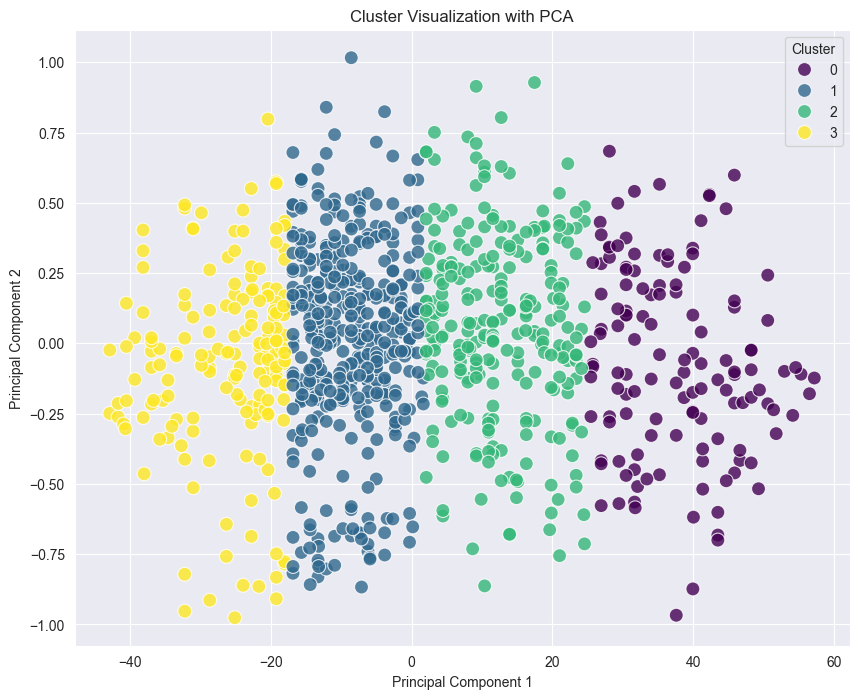

Calinski-Harabasz Index: 2892.3379315678603
Davies-Bouldin Index: 0.5765631714321316


In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Step 1: Normalize all columns and apply weighting to 'end_season_grade'
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Convert back to a DataFrame
normalized_data = pd.DataFrame(normalized_data, columns=clustering_data.columns)

# Apply weighting to the 'end_season_grade' feature
weight_factor = 100  # Adjust this to increase the feature's influence
normalized_data['end_season_grade'] *= weight_factor


# Step 2: Run KMeans clustering
n_clusters = 4  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Assign clusters back to the DataFrame
updated_data['Cluster'] = clusters

# Step 3: Dimensionality reduction using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(normalized_data)  # Use the weighted data

# Scatter plot of the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=updated_data['Cluster'], palette='viridis', s=100, alpha=0.8)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 4: Evaluate clustering quality
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

ch_score = calinski_harabasz_score(normalized_data, clusters)
db_score = davies_bouldin_score(normalized_data, clusters)

print(f"Calinski-Harabasz Index: {ch_score}")
print(f"Davies-Bouldin Index: {db_score}")


In [576]:
clustering_data

,penalty_success_rate,stadium_capacity_normalized,fixture_5_grade,fixture_10_grade,fixture_15_grade,fixture_20_grade,fixture_25_grade,fixture_30_grade,fixture_35_grade,fixture_40_grade,...,over_0_5_per_game,under_0_5_per_game,over_1_5_per_game,under_1_5_per_game,over_2_5_per_game,under_2_5_per_game,over_3_5_per_game,under_3_5_per_game,over_4_5_per_game,under_4_5_per_game
1,1.0000,0.212370,0.333333,0.400000,0.400000,0.400000,0.413333,0.433333,0.476190,0.450000,...,0.736842,0.263158,0.289474,0.710526,0.105263,0.894737,0.000000,1.000000,0.000000,1.000000
2,1.0000,0.212370,0.333333,0.433333,0.422222,0.433333,0.400000,0.400000,0.371429,0.325000,...,0.552632,0.447368,0.210526,0.789474,0.078947,0.921053,0.026316,0.973684,0.000000,1.000000
3,0.6667,0.712608,0.533333,0.666667,0.577778,0.633333,0.640000,0.611111,0.590476,0.541667,...,0.815789,0.184211,0.500000,0.500000,0.289474,0.710526,0.026316,0.973684,0.000000,1.000000
4,1.0000,0.884287,0.466667,0.666667,0.733333,0.683333,0.666667,0.700000,0.666667,0.616667,...,0.789474,0.210526,0.526316,0.473684,0.342105,0.657895,0.078947,0.921053,0.052632,0.947368
5,1.0000,0.465807,0.800000,0.600000,0.577778,0.533333,0.520000,0.488889,0.466667,0.458333,...,0.789474,0.210526,0.368421,0.631579,0.184211,0.815789,0.026316,0.973684,0.026316,0.973684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1.0000,0.421022,0.200000,0.166667,0.133333,0.150000,0.200000,0.211111,0.238095,0.233333,...,0.605263,0.394737,0.236842,0.763158,0.052632,0.947368,0.000000,1.000000,0.000000,1.000000
1490,1.0000,0.931939,0.866667,0.866667,0.866667,0.700000,0.640000,0.655556,0.628571,0.600000,...,0.763158,0.236842,0.526316,0.473684,0.289474,0.710526,0.105263,0.894737,0.052632,0.947368
1491,1.0000,0.684312,1.000000,0.933333,0.844444,0.850000,0.880000,0.822222,0.800000,0.758333,...,0.815789,0.184211,0.605263,0.394737,0.394737,0.605263,0.131579,0.868421,0.052632,0.947368
1492,1.0000,0.788106,0.800000,0.800000,0.777778,0.666667,0.666667,0.666667,0.666667,0.641667,...,0.789474,0.210526,0.394737,0.605263,0.263158,0.736842,0.131579,0.868421,0.026316,0.973684


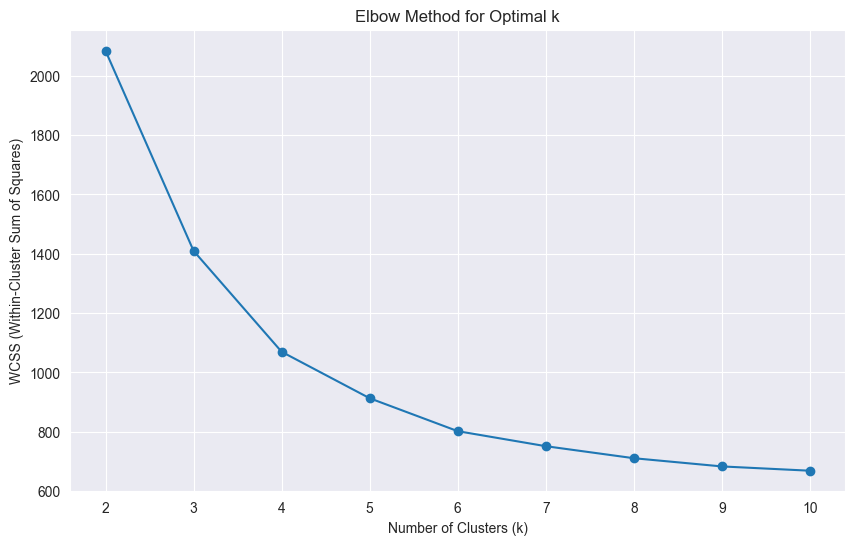

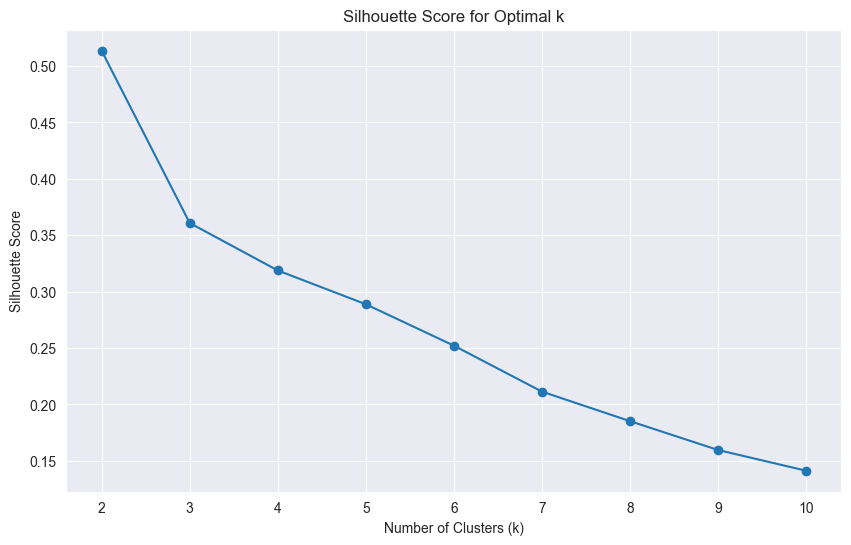

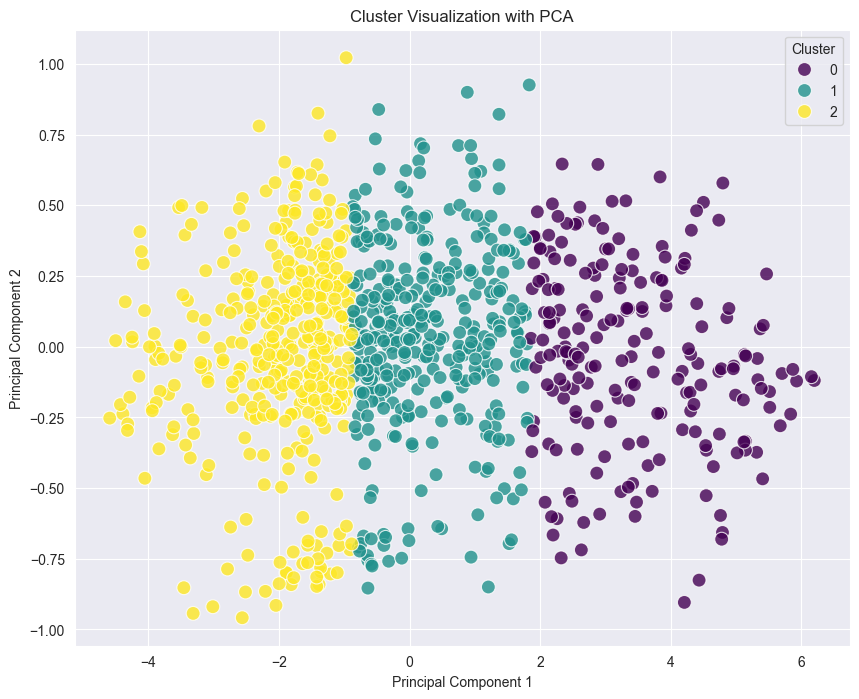

Calinski-Harabasz Index: 1383.6399796723472
Davies-Bouldin Index: 0.8894953051969264


In [577]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Step 1: Normalize all columns and apply weighting to 'end_season_grade'
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Convert back to a DataFrame
normalized_data = pd.DataFrame(normalized_data, columns=clustering_data.columns)

# Apply weighting to the 'end_season_grade' feature
weight_factor = 10  # Adjust this to increase the feature's influence
normalized_data['end_season_grade'] *= weight_factor
# Identify all columns matching the pattern 'fixture_X_grade'
fixture_grade_columns = [col for col in updated_data.columns if col.startswith('fixture_') and col.endswith('_grade')]

# Apply the weight to each column
for col in fixture_grade_columns:
    updated_data[col] = updated_data[col] * 5

# Step 2: Create the Elbow Chart and Silhouette Score Graph
wcss = []  # Within-cluster sum of squares
silhouette_scores = []  # Silhouette scores
max_clusters = 10  # Test up to this many clusters
for k in range(2, max_clusters + 1):  # Silhouette requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_data, cluster_labels))

# Plot the Elbow Chart
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Plot the Silhouette Score Graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 3: Choose the best k (from the elbow and silhouette graphs) and run KMeans
n_clusters = 3  # Replace this with the optimal value from the graphs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Assign clusters back to the DataFrame
updated_data['Cluster'] = clusters

# Step 4: Dimensionality reduction using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(normalized_data)  # Use the weighted data

# Scatter plot of the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=updated_data['Cluster'], palette='viridis', s=100, alpha=0.8)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 5: Evaluate clustering quality
ch_score = calinski_harabasz_score(normalized_data, clusters)
db_score = davies_bouldin_score(normalized_data, clusters)

print(f"Calinski-Harabasz Index: {ch_score}")
print(f"Davies-Bouldin Index: {db_score}")


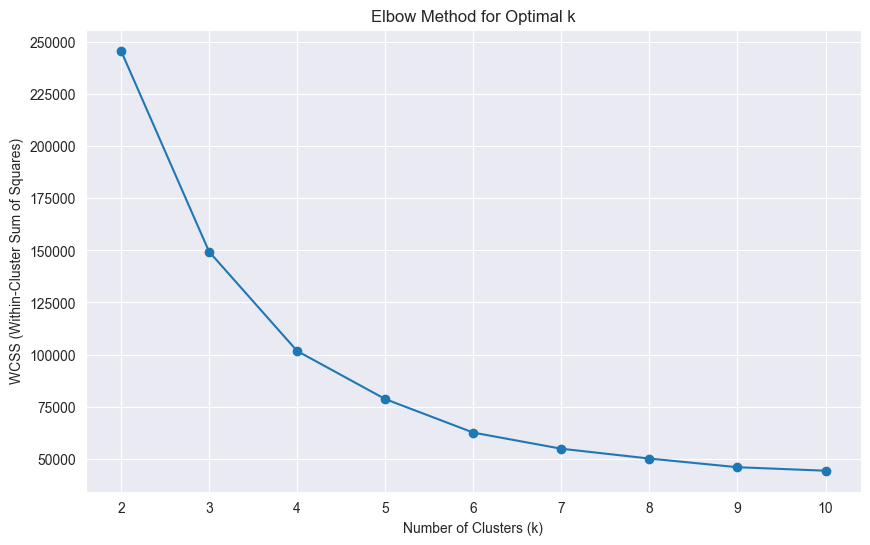

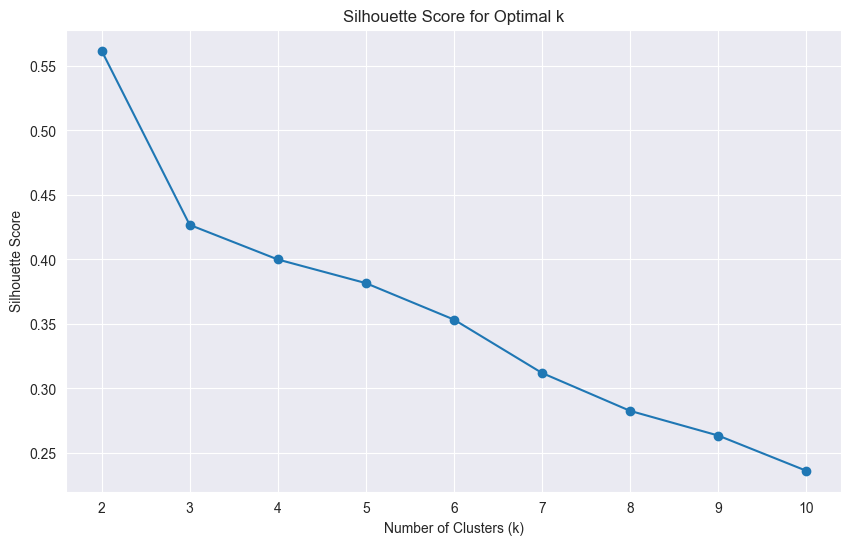

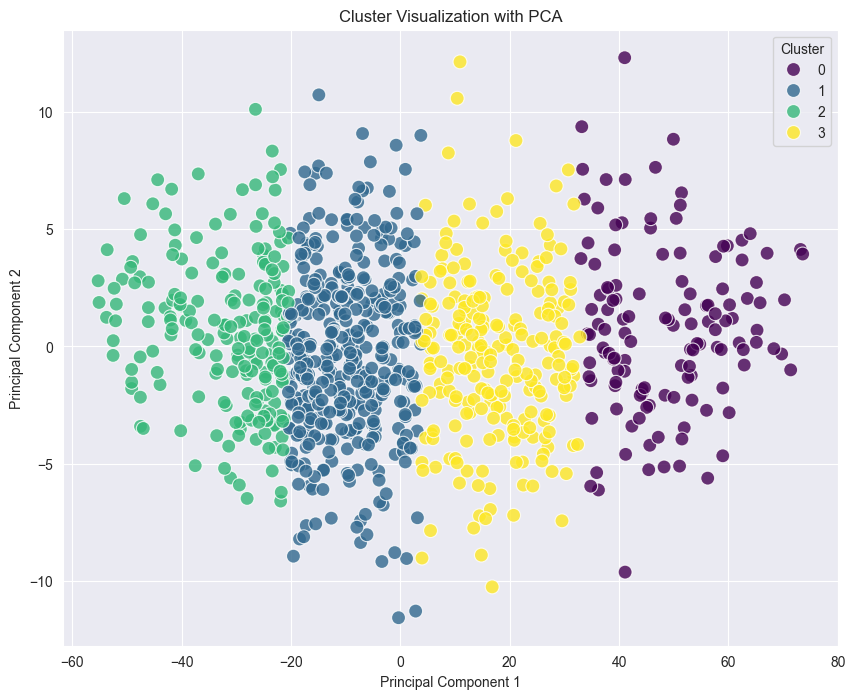

Silhouette Score: 0.40
Calinski-Harabasz Index: 1973.39
Davies-Bouldin Index: 0.76


In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Step 1: Normalize all columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Convert back to a DataFrame for manipulation
normalized_data = pd.DataFrame(normalized_data, columns=clustering_data.columns)

# Step 2: Apply weights to selected features
weight_factors2 = {
    # Existing features and weights
    'end_season_grade': 100,
    'fixture_5_grade': 4, 'fixture_10_grade': 4, 'fixture_15_grade': 10,
    'fixture_20_grade': 4, 'fixture_25_grade': 4, 'fixture_30_grade': 4,
    'fixture_35_grade': 4, 'fixture_40_grade': 4,
    'win_home_pct': 20, 'win_away_pct': 20,
    'loss_home_pct': 15, 'loss_away_pct': 15,
    'goals_scored_0_15_scaled': 10, 'goals_scored_16_30_scaled': 2,
    'goals_scored_31_45_scaled': 2, 'goals_scored_46_60_scaled': 2,
    'goals_scored_61_75_scaled': 2, 'goals_scored_76_90_scaled': 10,
    'stadium_capacity_normalized': 1,
    'yellow_card_sum_scaled': 1, 'red_card_sum_scaled': 1,
    # Add under/over and other game-related stats with weight 3
    'penalty_success_rate': 1,
    'clean_sheets_per_game': 7, 'failed_to_score_per_game': 7,
    'over_0_5_per_game': 3, 'under_0_5_per_game': 3,
    'over_1_5_per_game': 4, 'under_1_5_per_game': 3,
    'over_2_5_per_game': 3, 'under_2_5_per_game': 4,
    'over_3_5_per_game': 3, 'under_3_5_per_game': 3,
    'over_4_5_per_game': 5, 'under_4_5_per_game': 3
}

weight_factors3 = {
    'end_season_grade': 50,
    'win_home_pct': 20, 'win_away_pct': 20,
    'loss_home_pct': 20, 'loss_away_pct': 20,
    'fixture_15_grade': 10,
    'goals_scored_76_90_scaled': 8, 'goals_scored_0_15_scaled': 8,
    'failed_to_score_per_game': 5, 'clean_sheets_per_game': 5
}

weight_factors = {
    # Performance-related metrics
    'end_season_grade': 120,  # Increase to emphasize season-long performance
    'fixture_5_grade': 8, 'fixture_10_grade': 8, 'fixture_15_grade': 15,
    'fixture_20_grade': 8, 'fixture_25_grade': 8, 'fixture_30_grade': 8,
    'fixture_35_grade': 8, 'fixture_40_grade': 8,
    
    # Match outcomes
    'win_home_pct': 25, 'win_away_pct': 25,  # Increase to highlight home/away performance
    'loss_home_pct': 20, 'loss_away_pct': 20,
    
    # Goals scored in different intervals
    'goals_scored_0_15_scaled': 10, 'goals_scored_16_30_scaled': 5,
    'goals_scored_31_45_scaled': 5, 'goals_scored_46_60_scaled': 5,
    'goals_scored_61_75_scaled': 5, 'goals_scored_76_90_scaled': 10,  # Highlight critical scoring intervals

    # Miscellaneous team attributes
    'stadium_capacity_normalized': 1,  # Keep low since it may not correlate strongly
    'penalty_success_rate': 2,  # Slightly increased for relevance

    # Defensive and offensive game outcomes
    'clean_sheets_per_game': 10,  # Reflect strong defensive performance
    'failed_to_score_per_game': 10,  # Highlight offensive weaknesses

    # Over/Under game statistics
    'over_0_5_per_game': 4, 'under_0_5_per_game': 3,
    'over_1_5_per_game': 5, 'under_1_5_per_game': 4,
    'over_2_5_per_game': 4, 'under_2_5_per_game': 5,
    'over_3_5_per_game': 4, 'under_3_5_per_game': 4,
    'over_4_5_per_game': 5, 'under_4_5_per_game': 4,
    
    # Cards (less important for clustering but still useful)
    'yellow_card_sum_scaled': 2,
    'red_card_sum_scaled': 3  # Slightly higher for its impact in critical scenarios
}


for feature, weight in weight_factors.items():
    if feature in normalized_data.columns:
        normalized_data[feature] *= weight

# Step 3: Elbow Chart and Silhouette Score Graph
wcss = []  # Within-cluster sum of squares
silhouette_scores = []  # Silhouette scores
max_clusters = 10  # Test up to this many clusters

for k in range(2, max_clusters + 1):  # Silhouette requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_data, cluster_labels))

# Plot the Elbow Chart
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Plot the Silhouette Score Graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 4: Choose the best k and run KMeans
n_clusters = 4  # Replace this with the optimal value from the graphs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the DataFrame
normalized_data['Cluster'] = clusters

# Step 5: Dimensionality reduction using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(normalized_data.drop(columns=['Cluster']))

# Scatter plot of the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=normalized_data['Cluster'], palette='viridis', s=100, alpha=0.8)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Evaluate clustering quality
silhouette_avg = silhouette_score(normalized_data.drop(columns=['Cluster']), clusters)
ch_score = calinski_harabasz_score(normalized_data.drop(columns=['Cluster']), clusters)
db_score = davies_bouldin_score(normalized_data.drop(columns=['Cluster']), clusters)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
print(f"Davies-Bouldin Index: {db_score:.2f}")


In [579]:
# Calculate diversity metrics for each feature
diversity_metrics = pd.DataFrame({
    'Feature': normalized_data.columns,
    'Std Dev': normalized_data.std(),  # Standard deviation
    'Range': normalized_data.max() - normalized_data.min(),  # Range
    'Variance': normalized_data.var()  # Variance
}).sort_values(by='Std Dev', ascending=False)  # Sort by standard deviation

# Print the top features with the largest diversity
print("Features with the Largest Diversity:")
print(diversity_metrics.head(10))  # Adjust the number to see more features


# Add 'team_name' and 'season' from the original DataFrame to normalized_data
normalized_data['team_name'] = updated_data['team_name'].values
normalized_data['season'] = updated_data['season'].values

# Group data by cluster
cluster_groups = normalized_data.groupby('Cluster')

# Print teams and their seasons in each cluster
for cluster, group_data in cluster_groups:
    print(f"Cluster {cluster}:")
    print(group_data[['team_name', 'season']])  # Print team_name and season for each cluster
    print("\n" + "*" * 15 + "\n")  # Separator for readability


Features with the Largest Diversity:
                                             Feature    Std Dev  Range  \
end_season_grade                    end_season_grade  20.520184  100.0   
win_home_pct                            win_home_pct   4.139293   20.0   
win_away_pct                            win_away_pct   4.064451   20.0   
loss_home_pct                          loss_home_pct   2.977320   15.0   
loss_away_pct                          loss_away_pct   2.884035   15.0   
fixture_15_grade                    fixture_15_grade   1.934108   10.0   
goals_scored_76_90_scaled  goals_scored_76_90_scaled   1.571171   10.0   
goals_scored_0_15_scaled    goals_scored_0_15_scaled   1.541405   10.0   
failed_to_score_per_game    failed_to_score_per_game   1.321492    7.0   
clean_sheets_per_game          clean_sheets_per_game   1.129689    7.0   

                             Variance  
end_season_grade           421.077943  
win_home_pct                17.133747  
win_away_pct                

In [580]:
# Filter for Liverpool in the 2020 season
liverpool_2020 = normalized_data[(normalized_data['team_name'] == 'Liverpool') & (normalized_data['season'] == 2020)]

# Display the result
print(liverpool_2020['end_season_grade'].values[0])

# Find the row with the maximum 'end_season_grade'
max_grade_row = normalized_data.loc[normalized_data['end_season_grade'].idxmax()]

# Print the team name, season, and end_season_grade
print(f"Team with the highest end_season_grade:")
print(f"Team Name: {max_grade_row['team_name']}")
print(f"Season: {max_grade_row['season']}")
print(f"End Season Grade: {max_grade_row['end_season_grade']}")

# Sort the DataFrame by 'end_season_grade' in descending order
sorted_data = normalized_data.sort_values(by='end_season_grade', ascending=False)

# Select and print the relevant columns
# sorted_data[['team_name', 'season', 'end_season_grade','Cluster']]
sorted_data



62.65646731571627
Team with the highest end_season_grade:
Team Name: Bayer Leverkusen
Season: 2023
End Season Grade: 99.99999999999999


,penalty_success_rate,stadium_capacity_normalized,fixture_5_grade,fixture_10_grade,fixture_15_grade,fixture_20_grade,fixture_25_grade,fixture_30_grade,fixture_35_grade,fixture_40_grade,...,under_1_5_per_game,over_2_5_per_game,under_2_5_per_game,over_3_5_per_game,under_3_5_per_game,over_4_5_per_game,under_4_5_per_game,Cluster,team_name,season
808,1.0,0.308326,3.428571,3.724138,8.974359,3.538462,3.6250,3.828571,3.85,3.540230,...,0.070588,2.375000,0.833333,1.389706,1.610294,2.794118,1.323529,0,Bayer Leverkusen,2023
17,1.0,0.619920,3.428571,3.724138,10.000000,4.000000,3.6875,3.885714,4.00,4.000000,...,0.200000,2.625000,0.500000,1.776316,1.223684,3.750000,0.750000,0,Manchester City,2017
426,1.0,0.621360,4.000000,3.724138,10.000000,4.000000,4.0000,4.000000,4.00,3.954023,...,0.400000,1.750000,1.666667,1.065789,1.934211,1.250000,2.250000,0,Liverpool,2019
570,1.0,0.869413,4.000000,4.000000,9.230769,3.615385,3.3750,3.714286,3.75,3.448276,...,0.517647,2.095588,1.205882,1.191176,1.808824,2.794118,1.323529,0,Bayern München,2015
14,1.0,0.619920,3.428571,3.448276,9.487179,3.153846,3.1250,3.485714,3.80,3.908046,...,0.500000,2.125000,1.166667,1.243421,1.756579,3.125000,1.125000,0,Manchester City,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.0,0.345136,2.000000,1.517241,2.051282,0.461538,0.2500,0.000000,0.00,0.000000,...,2.114286,0.000000,4.000000,0.000000,3.000000,0.000000,3.000000,3,Toulouse,2019
188,1.0,0.396407,0.571429,0.413793,1.025641,0.461538,0.2500,0.057143,0.10,0.183908,...,2.400000,0.125000,3.833333,0.000000,3.000000,0.000000,3.000000,3,Salernitana,2023
472,1.0,0.465807,0.857143,0.413793,0.512821,0.153846,0.4375,0.171429,0.15,0.183908,...,2.500000,0.000000,4.000000,0.000000,3.000000,0.000000,3.000000,3,Aston Villa,2015
36,1.0,0.237511,0.285714,0.827586,1.538462,0.384615,0.1250,0.057143,0.10,0.137931,...,3.000000,0.125000,3.833333,0.000000,3.000000,0.000000,3.000000,3,Huddersfield,2018


Features with the Largest Diversity:
                                                 Feature  Diversity_Score  \
stadium_capacity_normalized  stadium_capacity_normalized         1.000000   
fixture_5_grade                          fixture_5_grade         0.989031   
win_home_pct                                win_home_pct         0.904535   
end_season_grade                        end_season_grade         0.898044   
yellow_card_sum                          yellow_card_sum         0.891538   
yellow_card_sum_scaled            yellow_card_sum_scaled         0.891538   
win_away_pct                                win_away_pct         0.890783   
fixture_35_grade                        fixture_35_grade         0.876661   
fixture_30_grade                        fixture_30_grade         0.874956   
loss_home_pct                              loss_home_pct         0.873534   
fixture_40_grade                        fixture_40_grade         0.870082   
fixture_15_grade                       

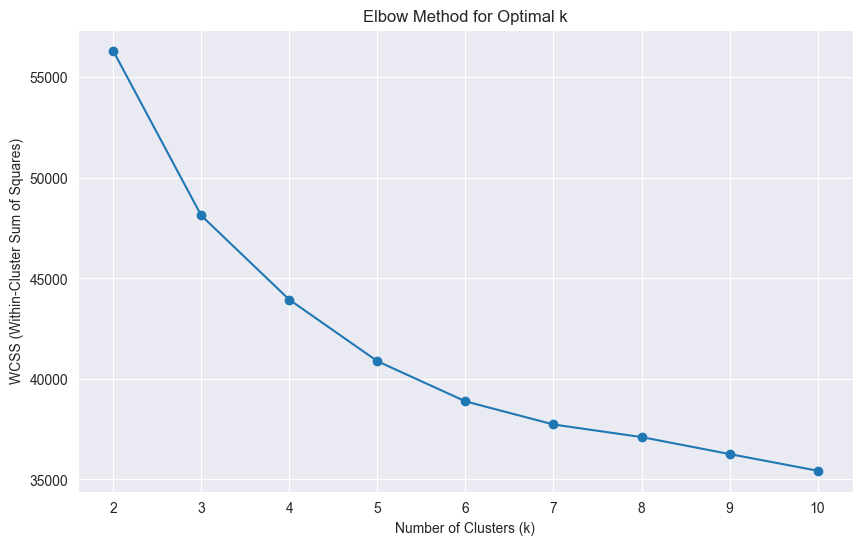

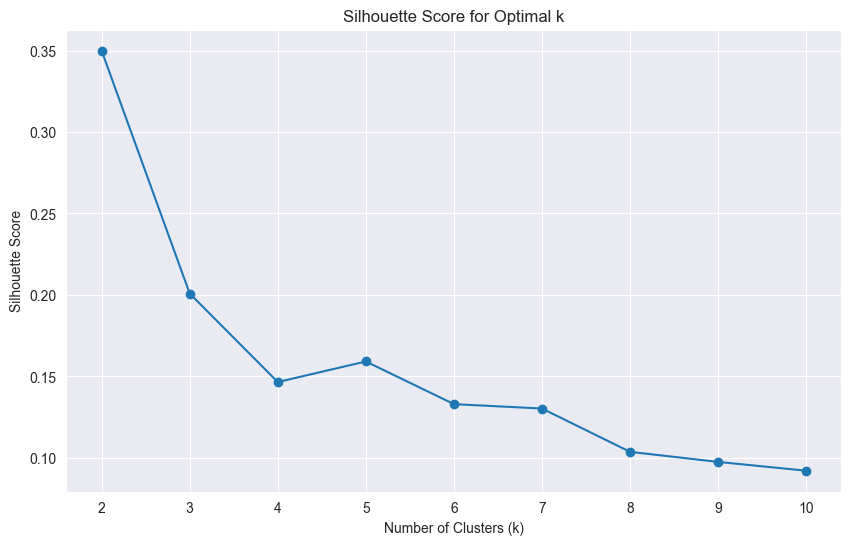

Silhouette Score: 0.15
Calinski-Harabasz Index: 367.79
Davies-Bouldin Index: 1.83


C:\Users\peret\AppData\Local\Temp\ipykernel_33144\3597941375.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


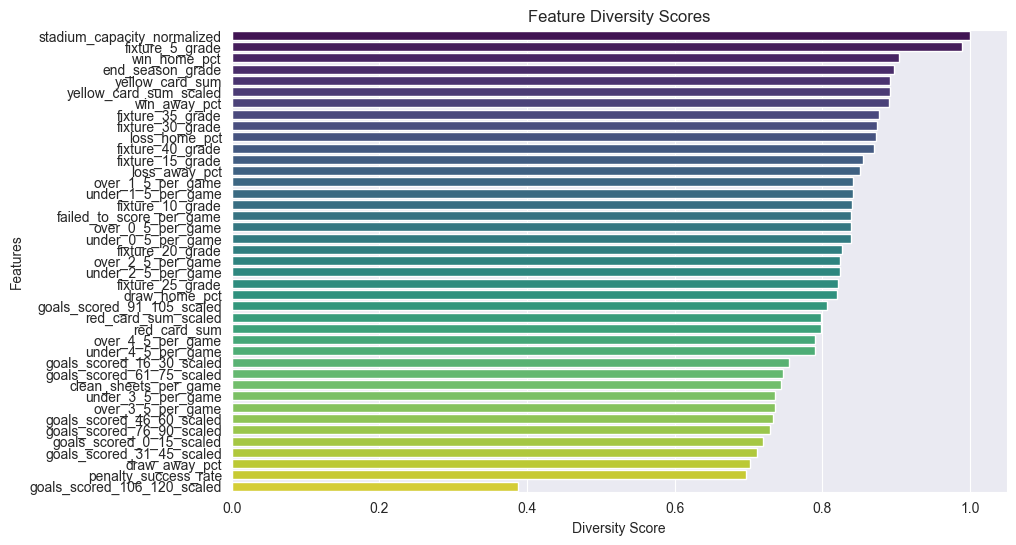